In [24]:
v25v5=[2.25 , 27.26, 33.78 , 53.44, 80.33, 120.47]
v25v10=[8.30 , 23.61 , 40.30 , 61.78 , 90.97 ,136.74 ]
v25v15=[ 11.56 , 29.88 , 54.25 , 87.96 , 144.63]


v30v5=[ 6.02 , 19.01 , 36.64 , 59.28 , 97.02]
v30v10=[3.72 , 19.00 , 36.20 , 58.78 , 94.07 ]
v30v15=[2.43 , 19.55 , 38.39 , 63.51 , 102.95  ]

v35v5=[6.60 , 24.91 , 44.48 , 73.60 , 116.27 ]
v35v10=[2.88 , 18.52 , 38.25 , 64.94 , 100.46 ]
v35v15=[2.72 , 20.26 , 41.22 , 72.66 , 116.45 ]

v40v5=[ 1.60 , 16.41 ,  36.11, 62.11 , 101.83]
v40v10=[ 4.97 , 21.08 , 42.99 , 69.65 , 108.35]
v40v15=[2.20 , 17.85  , 38.44 , 62.49 , 99.68 ]

v45v5=[9.87, 25.20 ,44.01 , 68.78 , 102.57]
v45v10=[ 7.69 , 23.84 , 43.34 , 67.32, 104.76 ]
v45v15=[1.01 , 15.22 , 30.51 , 52.53 , 81.77]

v50v5=[ 6.73 , 24.48 , 45.10 , 71.98 , 116.05]
v50v10=[ 3.75 , 19.23 , 36.51 , 58.45 , 89.36]
v50v15=[14.49 , 34.86 , 59.53 , 96.50 , 155.22 ]

vvv = [v25v5,v25v10,v25v15,v30v5,v30v10,v30v15,v35v5,v35v10,v35v15,v40v5,v40v10,v40v15,v45v5,v45v10,v45v15,v50v5,v50v10,v50v15]


%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

lamb = []
lamb_err =[]

def func(k):
    
    s =[]
    T =[]
    for i in range(len(k)-1):
        s.append((k[i+1]-k[i]))
        T.append((k[i+1]+k[i])/2)
        
    ln_s_err = (np.sqrt(2)*0.3)/s
    s=np.log(s)
    Terr = len(T)*[0.3]
    
    def fit_func(p, x):
        m ,c= p
        return m*x+c

    linear = Model(fit_func)

    data = RealData(T, s, sx=Terr, sy=ln_s_err)

    odr= ODR(data, linear, beta0=[0., 1.])

    out = odr.run()

    #out.pprint()

    x_fit = np.linspace(T[0]-0.5, T[-1]+0.5, 1000)
    y_fit = fit_func(out.beta, x_fit)
    #plt.errorbar(T, s, xerr=Terr, yerr=ln_s_err, linestyle='None', marker='x',ecolor='r')
    #plt.plot(x_fit, y_fit)
    lamb.append(out.beta[0])
    lamb_err.append(out.sd_beta[0])
    
    return 
    

for i in range(len(vvv)):
    func(vvv[i])
    

#print(lamb)
#print(lamb_err)

lup = 0
ldown = 0
lerr = 0

for i in range(len(lamb)):
    lup += lamb[i]/lamb_err[i]**2
    ldown += 1/lamb_err[i]**2
    lerr += lamb_err[i]**2
    
llambda = lup/ldown
llambdaerr = np.sqrt(lerr/(len(lamb)**2))

hlife = np.log(2.)/llambda
hlifeerr = (np.log(2.)/llambda**2)*llambdaerr
print('lambda: \n' ,np.round(lamb,4))
print('lambda error: \n' ,np.round(lamb_err,4))
print('lambda:' , llambda)
print ('lambda err:' , llambdaerr)
print('half life:' , hlife)
print('half life err:', hlifeerr)
print('Error of experiment: ' , abs(55.6-hlife)/hlifeerr)

lambda: 
 [0.0074 0.0118 0.0116 0.0159 0.0138 0.0125 0.0114 0.011  0.0109 0.0131
 0.0109 0.0119 0.0115 0.0124 0.0129 0.0123 0.0117 0.0105]
lambda error: 
 [0.0034 0.0003 0.0002 0.0007 0.001  0.001  0.001  0.0008 0.001  0.0004
 0.0007 0.001  0.0003 0.0008 0.0013 0.0008 0.0008 0.0005]
lambda: 0.011832778751981073
lambda err: 0.00026277952733929965
half life: 58.578563420185375
half life err: 1.300898760166062
Error of experiment:  2.2896196932382002
2.3076923076923075


<IPython.core.display.Javascript object>


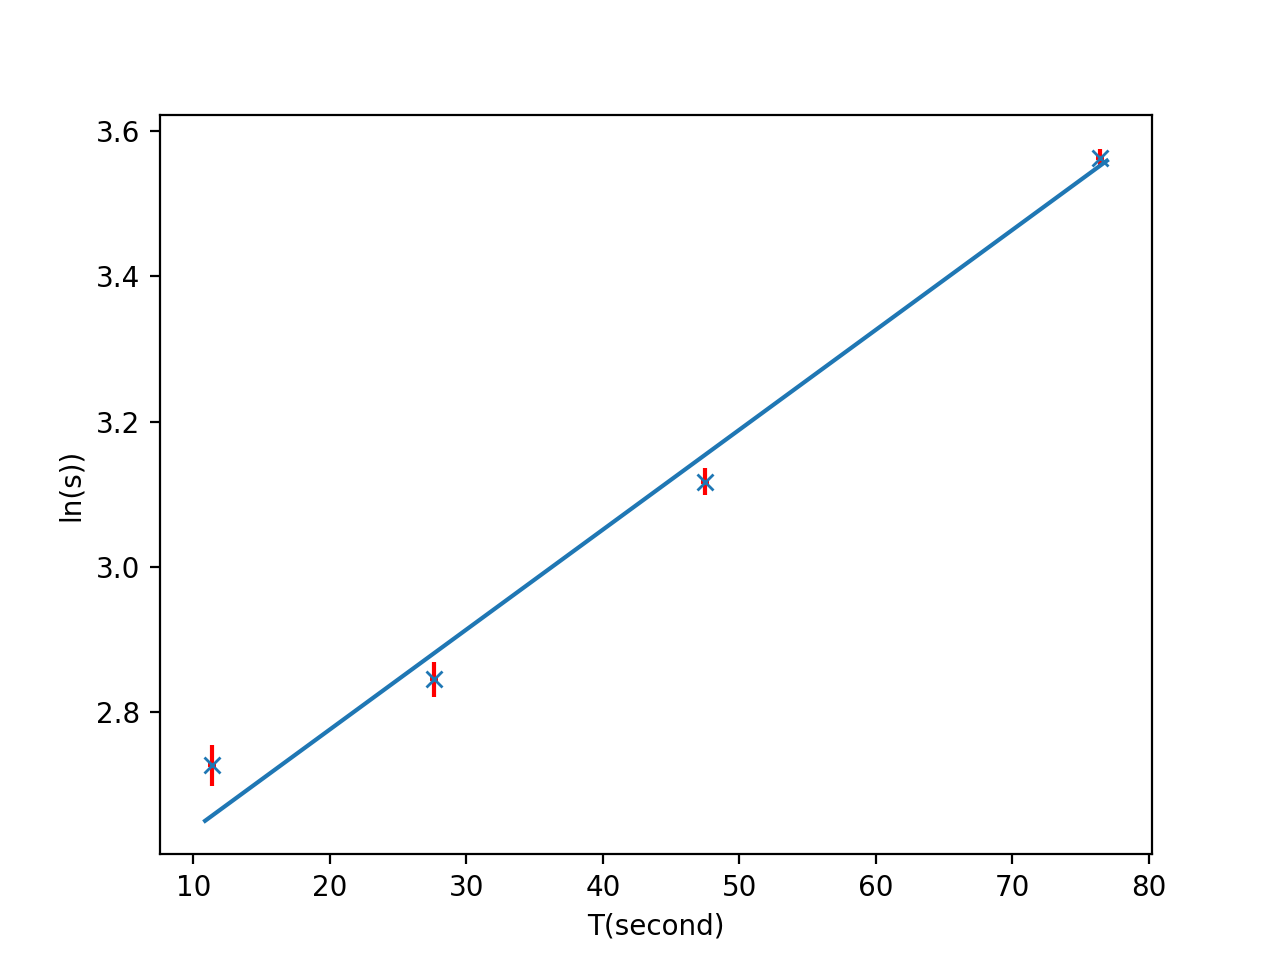

In [10]:
v25v5=[2.25 , 27.26, 33.78 , 53.44, 80.33, 120.47]
v25v10=[8.30 , 23.61 , 40.30 , 61.78 , 90.97 ,136.74 ]
v25v15=[ 11.56 , 29.88 , 54.25 , 87.96 , 144.63]


v30v5=[ 6.02 , 19.01 , 36.64 , 59.28 , 97.02]
v30v10=[3.72 , 19.00 , 36.20 , 58.78 , 94.07 ]
v30v15=[2.43 , 19.55 , 38.39 , 63.51 , 102.95  ]

v35v5=[6.60 , 24.91 , 44.48 , 73.60 , 116.27 ]
v35v10=[2.88 , 18.52 , 38.25 , 64.94 , 100.46 ]
v35v15=[2.72 , 20.26 , 41.22 , 72.66 , 116.45 ]

v40v5=[ 1.60 , 16.41 ,  36.11, 62.11 , 101.83]
v40v10=[ 4.97 , 21.08 , 42.99 , 69.65 , 108.35]
v40v15=[2.20 , 17.85  , 38.44 , 62.49 , 99.68 ]

v45v5=[9.87, 25.20 ,44.01 , 68.78 , 102.57]
v45v10=[ 7.69 , 23.84 , 43.34 , 67.32, 104.76 ]
v45v15=[1.01 , 15.22 , 30.51 , 52.53 , 81.77]

v50v5=[ 6.73 , 24.48 , 45.10 , 71.98 , 116.05]
v50v10=[ 3.75 , 19.23 , 36.51 , 58.45 , 89.36]
v50v15=[14.49 , 34.86 , 59.53 , 96.50 , 155.22 ]

vvv = [v25v5,v25v10,v25v15,v30v5,v30v10,v30v15,v35v5,v35v10,v35v15,v40v5,v40v10,v40v15,v45v5,v45v10,v45v15,v50v5,v50v10,v50v15]


%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

lamb = []
lamb_err =[]

def func(k):
    
    s =[]
    T =[]
    for i in range(len(k)-1):
        s.append((k[i+1]-k[i]))
        T.append((k[i+1]+k[i])/2)
        
    ln_s_err = (np.sqrt(2)*0.3)/s
    s=np.log(s)
    Terr = len(T)*[0.3]
    
    def fit_func(p, x):
        m ,c= p
        return m*x+c

    linear = Model(fit_func)

    data = RealData(T, s, sx=Terr, sy=ln_s_err)

    odr= ODR(data, linear, beta0=[0., 1.])

    out = odr.run()

    #out.pprint()

    x_fit = np.linspace(T[0]-0.5, T[-1]+0.5, 1000)
    y_fit = fit_func(out.beta, x_fit)
    plt.errorbar(T, s, xerr=Terr, yerr=ln_s_err, linestyle='None', marker='x',ecolor='r')
    plt.xlabel('T(second)')
    plt.ylabel('ln(s)')
    plt.plot(x_fit, y_fit)
    lamb.append(out.beta[0])
    lamb_err.append(out.sd_beta[0])
    
    return 
    


func(vvv[4])
    

plt.savefig('last.jpg')